In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

In [3]:
df = pd.read_csv('mental_health_dataset.csv')

In [4]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [5]:
df.info

<bound method DataFrame.info of        age      gender employment_status work_environment  \
0       56        Male          Employed          On-site   
1       46      Female           Student          On-site   
2       32      Female          Employed          On-site   
3       60  Non-binary     Self-employed          On-site   
4       25      Female     Self-employed          On-site   
...    ...         ...               ...              ...   
19995   34      Female          Employed          On-site   
19996   47        Male          Employed          On-site   
19997   56      Female          Employed          On-site   
19998   24        Male          Employed          On-site   
19999   44        Male        Unemployed           Remote   

      mental_health_history seeks_treatment  stress_level  sleep_hours  \
0                       Yes             Yes             6          6.2   
1                        No             Yes            10          9.0   
2            

In [6]:
df.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

# EDA

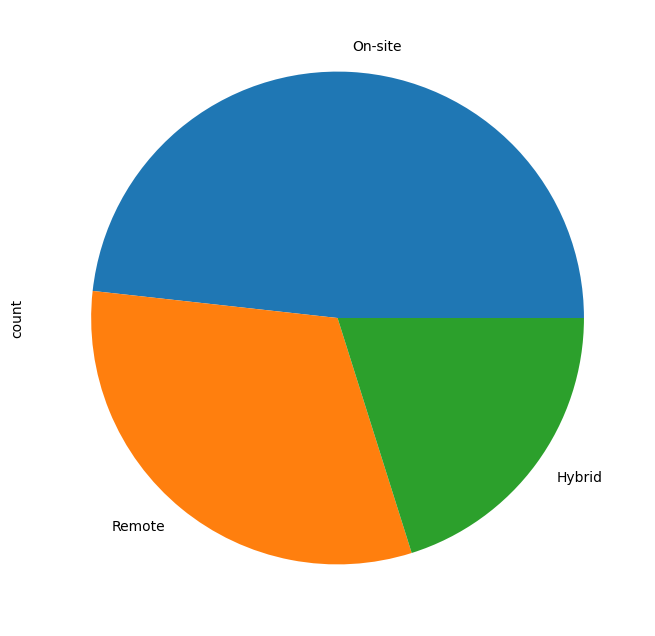

In [7]:
ab = df[df['mental_health_risk'] == 'High']
Workenv = ab['work_environment'].value_counts()
plt.figure(figsize = (15,8))
Workenv.plot(kind = 'pie')
plt.show()

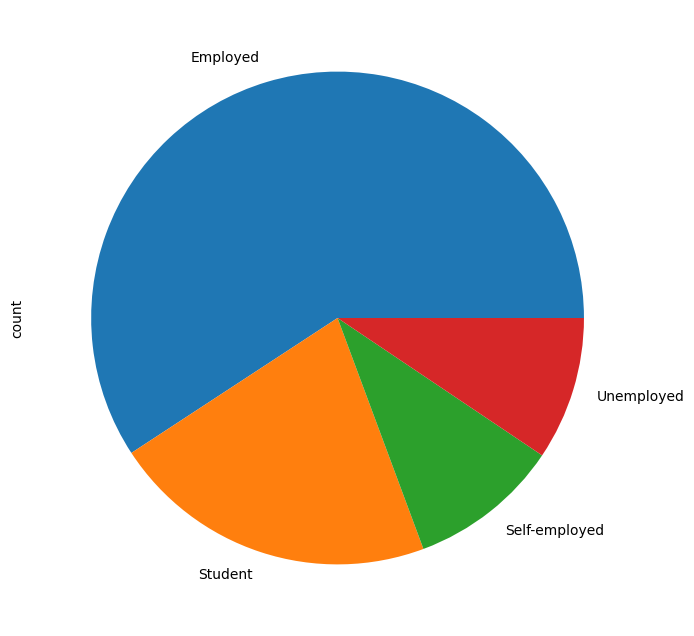

In [8]:

Work = ab['employment_status'].value_counts()
plt.figure(figsize = (15,8))
Work.plot(kind = 'pie')
plt.show()

### EMPLOYMENT DATA FOR HIGH RISK PEOPLE
### employed = 2806 (59.2%)
### student = 1016 (21.4%)
### self employed = 470 (9.91%)
### unemployed = 446 (9.41%)

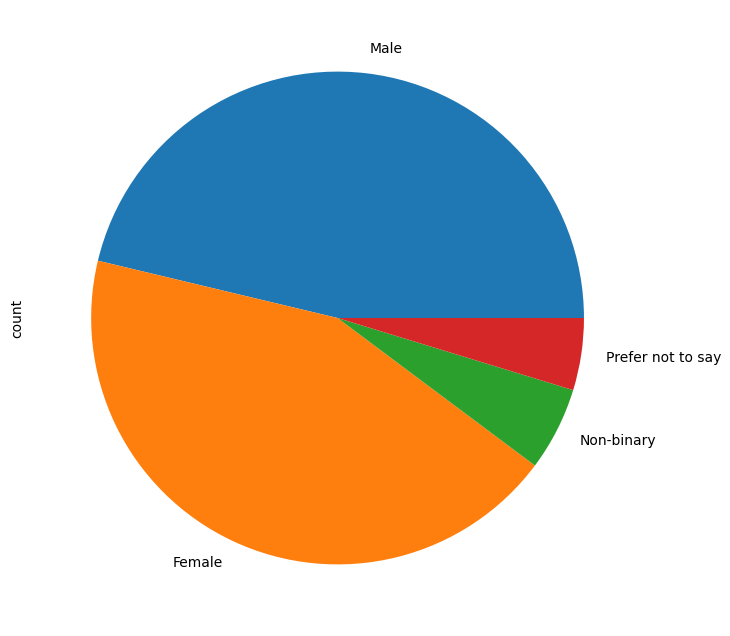

In [9]:
Gender = ab ['gender'].value_counts()
Gender
plt.figure(figsize = (15,8))
Gender.plot(kind = 'pie')
plt.show()

### MALE = 2192 (46.26%)
### FEMALE = 2062 (43.52%)
### OTHERS = 484 (10.2%)

# BASE MODEL

In [10]:
df['gender'] = df['gender'].replace({"Male": 1, "Female": 0, "Non-binary": 2, "Prefer not to say": 3})
df['employment_status'] = df['employment_status'].replace({"Employed": 1, "Unemployed": 0, "Self-employed": 2, "Student": 3})
df['work_environment'] = df['work_environment'].replace({"On-site": 1, "Hybrid": 0, "Remote": 2 })
df['mental_health_history'] = df['mental_health_history'].replace({"Yes": 1, "No": 0})
df['seeks_treatment'] = df['seeks_treatment'].replace({"Yes": 1, "No": 0})
X = df[['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score']]
y= df['mental_health_risk']

C:\Users\hs298\AppData\Local\Temp\ipykernel_20784\2547121934.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({"Male": 1, "Female": 0, "Non-binary": 2, "Prefer not to say": 3})
C:\Users\hs298\AppData\Local\Temp\ipykernel_20784\2547121934.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['employment_status'] = df['employment_status'].replace({"Employed": 1, "Unemployed": 0, "Self-employed": 2, "Student": 3})
C:\Users\hs298\AppData\Local\Temp\ipykernel_20784\2547121934.py:3: FutureWarning:

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier(n_estimators = 5000)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5000)

In [12]:
y_pred = model.predict(X_test)

In [13]:
y_pred

array(['Medium', 'Low', 'Medium', ..., 'High', 'Low', 'High'],
      dtype=object)

In [22]:
score1 = model.score(X_test, y_test)
score2 = model.score(X_train,y_train)
accuracy1 = score1*100
accuracy2 = score2*100 

In [23]:
print(f"Accuracy Test: {accuracy1 } %")
print(f"Accuracy Train: {accuracy2 } %")

Accuracy Test: 99.3 %
Accuracy Train: 100.0 %


In [16]:
from sklearn.tree import DecisionTreeClassifier
Model1 = DecisionTreeClassifier()
Model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
score = Model1.score(X_test, y_test)
accuracy = score*100 
print(f"Accuracy : {accuracy} %")

Accuracy : 100.0 %


In [18]:
df.head(50)


,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,1,1,1,1,6,6.2,3,28,17,54,59.7,High
1,46,0,3,1,0,1,10,9.0,4,30,11,85,54.9,High
2,32,0,1,1,1,0,7,7.7,2,24,7,62,61.3,Medium
3,60,2,2,1,0,0,4,4.5,4,6,0,95,97.0,Low
4,25,0,2,1,1,1,3,5.4,0,24,12,70,69.0,High
5,38,0,0,1,1,1,3,9.9,3,17,9,63,69.3,Medium
6,56,2,1,2,0,1,2,5.5,1,25,3,87,63.1,Medium
7,36,1,3,2,0,0,8,7.1,5,25,8,72,58.4,Medium
8,40,1,1,0,0,0,7,6.5,6,28,6,46,60.4,Medium
9,28,0,1,2,0,0,8,3.1,0,7,18,88,93.2,Medium


In [19]:
Model1.predict([[56,1,1,1,1,1,6,6.2,3,28,17,54,59.7]])

C:\Users\hs298\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['High'], dtype=object)

In [20]:
def prediction(Name):
    Age = input("Age :")
    gen = input("Gender : (1 for male ,0 for female, 2 for non binary ,3 prefer not to say)")
    emp  = input("employment : (1 for employed ,0 for unemployed, 2 for self-employed ,3 for student)")
    wenv = input("work envorment : (1 for On-site ,0 for hybrid, 2 for remote )")
    mhistory = input("Mental_health History ? 1 for yes , 0 for No")
    thistory = input("Have you ever seeked Treatment ? 1 for yes , 0 for No")
    Stres = input("Stress LEvel 1-10")
    shours = input("Sleep Hours")
    pdays = input("physical Activity Days")
    dep = input("Depression ? 0-5 - Minimal , 5-9 - Mild , 10-14 - Moderate , 15-20 - Moderately Severe, 20- 30 - Severe")
    anx = input("Anxiety Score ? 0 - 21 ")
    soci = input("Social_Support_Score")
    prod = input("Productivivty Score")
    x = Model1.predict([[Age,gen,emp,wenv,mhistory,thistory,Stres,shours,pdays,dep,anx,soci,prod]])
    print(f"Hello {Name} Your Mental Health Risk Is {x}")

In [21]:
Name = input("Enter Your Name")
prediction(Name)

Enter Your Name Harsh
Age : 21
Gender : (1 for male ,0 for female, 2 for non binary ,3 prefer not to say) 1
employment : (1 for employed ,0 for unemployed, 2 for self-employed ,3 for student) 3
work envorment : (1 for On-site ,0 for hybrid, 2 for remote ) 0
Mental_health History ? 1 for yes , 0 for No 1
Have you ever seeked Treatment ? 1 for yes , 0 for No 0
Stress LEvel 1-10 7
Sleep Hours 6
physical Activity Days 0
Depression ? 0-5 - Minimal , 5-9 - Mild , 10-14 - Moderate , 15-20 - Moderately Severe, 20- 30 - Severe 15
Anxiety Score ? 0 - 21  7
Social_Support_Score 7
Productivivty Score 77


Hello Harsh Your Mental Health Risk Is ['Medium']


C:\Users\hs298\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [31]:
y_pred = Model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Prediction Accuracy: {accuracy*100} %')

Prediction Accuracy: 100.0 %


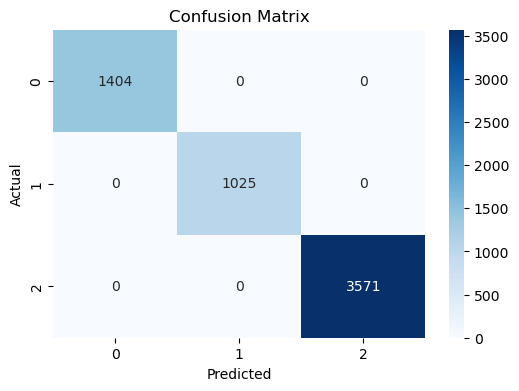

In [30]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [34]:
from joblib import dump
dump(model, 'menV1.joblib')

['menV1.joblib']